In [ ]:
import fs
MAIN_DIR = fs.open_fs("../../data/raw/Estaciones")
INF_DBF_DIR = MAIN_DIR.getsyspath("Infraestructura ciclista total.dbf")
COV_DBF_DIR = MAIN_DIR.getsyspath("cobertura_ciclo_vias_500m.dbf")


In [ ]:
import pandas as pd
from simpledbf import Dbf5

infraestructura_dbf = Dbf5(INF_DBF_DIR)
infraestructura_df = infraestructura_dbf.to_dataframe()
infraestructura_df

PyTables is not installed. No support for HDF output.


,ID_TRAMO,ID_PROY,NOMBRE,TIPO_IC,ALCALDIA,VIALIDAD,TIPO_VIA,ESTADO,INSTANCIA,A_HABILITA,A_LICITA,LONG_KM
0,1,1,Senderos Bosque de Chapultepec I Sección,Sendero compartido,Miguel Hidalgo,Gran Avenida,Secundaria,En operacion,Gobierno Central,ND,ND,2.04
1,2,1,Senderos Bosque de Chapultepec I Sección,Sendero compartido,Miguel Hidalgo,Gran Avenida,Secundaria,En operacion,Gobierno Central,ND,ND,0.24
2,3,1,Senderos Bosque de Chapultepec I Sección,Sendero compartido,Miguel Hidalgo,Avenida Grutas,Secundaria,En operacion,Gobierno Central,ND,ND,0.48
3,4,1,Senderos Bosque de Chapultepec I Sección,Sendero compartido,Miguel Hidalgo,Calzada Mahatma Gandhi,Secundaria,En operacion,Gobierno Central,ND,ND,0.25
4,5,1,Senderos Bosque de Chapultepec I Sección,Sendero compartido,Miguel Hidalgo,Acceso Museo de Arte Moderno,Secundaria,En operacion,Gobierno Central,ND,ND,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...
593,597,193,Ciclovía Niños Héroes,Ciclovia,Cuauhtémoc,Niños Héroes,Primaria,En construccion,Gobierno Central,ND,2023,1.20
594,598,193,Ciclovía Niños Héroes,Ciclovia,Cuauhtémoc,Niños Héroes,Primaria,En construccion,Gobierno Central,ND,2023,1.16
595,107,22,Ciclovía Av. Chapultepec,Ciclovia,Cuauhtémoc,Eje 1 Sur Avenida Chapultepec,Primaria,Fuera de servicio,Gobierno Central,2012,ND,0.16
596,514,166,Bus Bici Eje 3 Sur I,Carril bus bici,Cuauhtémoc,Eje 3 Sur Doctor Ignacio Morones Prieto,Primaria,Fuera de servicio,Gobierno Central,2021,2021,0.18


# Diccionario de Infraestructura ciclista total

| Nombre | Etiqueta | Descripción | Tipo |
|--------|----------|-------------|------|
|ID_TRAMO| ID del tramo| Es el identificador del tramo de infraestructura ciclista, considerando vialidad, alcaldía, tipo de infraestructura ciclista, sentido y estado de servicio|Numérico|
|ID_PROY|ID del proyecto|Es el identificador del proyecto al que pertenece el tramo de infraestructura ciclista|Numérico|
|NOMBRE|Nombre|Es el nombre de la infraestructura ciclista|Texto|
|TIPO_IC|Tipo de Infraestructura|Es el tipo de infraestructura ciclista: carril bus bici, carril de prioridad ciclista, ciclocarril, ciclovía, ciclovía bidireccional, infraestructura ciclista emergente, sendero compartido|Texto|
|ALCALDIA|Alcaldía|Es el nombre de la alcaldía|Texto|
|VIALIDAD|Vialidad|Es el nombre de la vialidad donde se encuentra la infraestructura ciclista|Texto|
|TIPO_VIA|Tipo de Vialidad|Es el tipo de vialidad donde se encuentra la infraestructura ciclista: avenida principal, eje vial, secundaria, vía de acceso controlado|Texto|
|ESTADO|Estado|Es el estatus de servicio que tiene el tramo dependiendo las condiciones de infraestructura: en operación, en construcción, fuera de servicio|Texto|
|INSTANCIA|Instancia|Es el organismo, institución o alcaldía que colabora para la implementación de la ciclovía: Gobierno central, Alcaldía o UNAM|Texto|
|A_HABILITA|Año de Habilitación|Es el año en el que el tramo incia la operación |Numérico|
|A_LICITA|Año de Licitación|Es el año en el que se licitó la construcción del tramo, información disponible para tramos licitados entre 2019 y 2022 por el Gobierno Central|Numérico|
|LONG_KM|Longitud km2|Es la longitud estimada en kilómetros del tramo de ciclovía|Numérico|

In [ ]:
import matplotlib.pyplot as plt

def stacked_barplot(df, col1, col2, count, title):
    # Convert the DataFrame to a dictionary
    data = df.set_index([col1, col2])[count].unstack().to_dict('dict')

    # Create lists for x-axis labels and stacked bar values
    labels = list(data.keys())
    state_type = list(df[col1].unique())
    state_type.sort()
    values = list(data.values())

    count_values = [list(i.values()) for i in values]

    count_values_list = [pd.Series(i, dtype=object).fillna(0).tolist() for i in count_values]

    # Calculate total height for each alcaldia
    totals = [sum(values) for values in count_values_list]

    # Create a list of tuples (alcaldia, total_height, values)
    alcaldia_totals = list(zip(labels, totals, count_values_list))

    # Sort the list in descending order based on total_height
    alcaldia_totals.sort(key=lambda x: x[1], reverse=True)

    # Extract the sorted alcaldia names and values
    sorted_labels, sorted_totals, sorted_values = zip(*alcaldia_totals)

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    colors = ['#e3f2fd','#2196f3','#1565c0']

    # Plot the stacked bar chart with sorted labels and values
    bars = ax.bar(sorted_labels, [val[0] for val in sorted_values], label=state_type[0])
    for i in range(1, len(state_type)):
        bottom = [sum(val[:i]) for val in sorted_values]
        bars = ax.bar(sorted_labels, [val[i] for val in sorted_values], bottom=bottom, label=state_type[i], color=colors[i])

    # Add total height annotation above each bar
    for bar, total in zip(bars, sorted_totals):
        bar_height = bar.get_height()
        ax.annotate(
            f"{total}",
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

    # Set labels and title
    ax.set_xlabel(col2)
    ax.set_ylabel(count)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.legend()

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
vias_operacionales_df = infraestructura_df[['ALCALDIA','ESTADO']].groupby(['ALCALDIA','ESTADO']).size().reset_index(name='COUNT')
vias_operacionales_df.head()

,ALCALDIA,ESTADO,COUNT
0,Azcapotzalco,En operacion,34
1,Azcapotzalco,Fuera de servicio,2
2,Benito Juárez,En operacion,68
3,Benito Juárez,Fuera de servicio,21
4,Coyoacán,En operacion,17


In [ ]:
type_ci_count = infraestructura_df[['ALCALDIA','TIPO_IC']].groupby(['ALCALDIA','TIPO_IC']).size().reset_index(name='COUNT')
type_ci_count.head()

,ALCALDIA,TIPO_IC,COUNT
0,Azcapotzalco,Carril bus bici,2
1,Azcapotzalco,Carril de prioridad ciclista,2
2,Azcapotzalco,Ciclocarril,2
3,Azcapotzalco,Ciclovia,20
4,Azcapotzalco,Ciclovia bidireccional,9


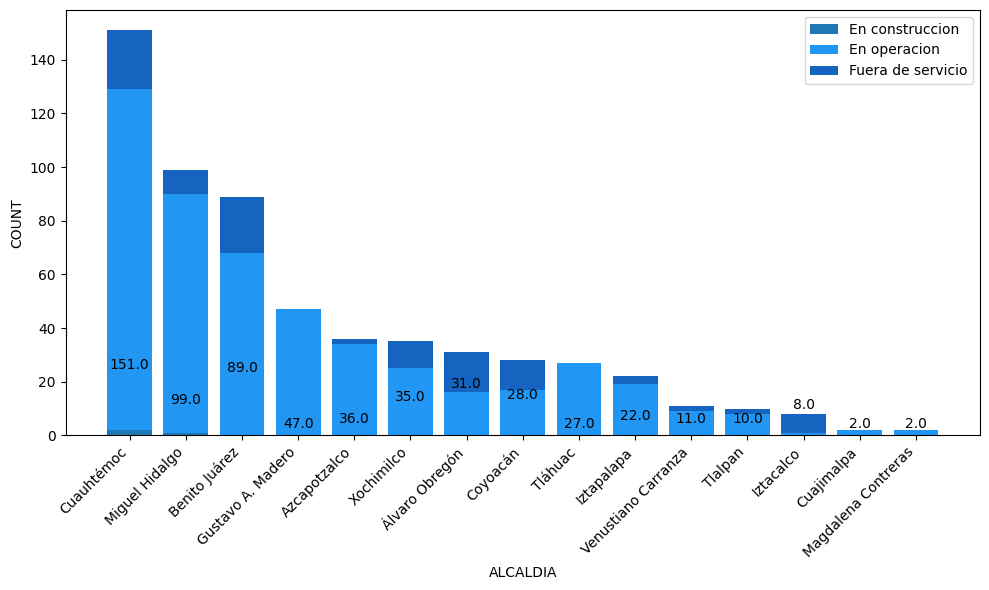

In [ ]:
stacked_barplot(df=vias_operacionales_df,
                col1='ESTADO',
                col2='ALCALDIA',
                count='COUNT',
                title='')

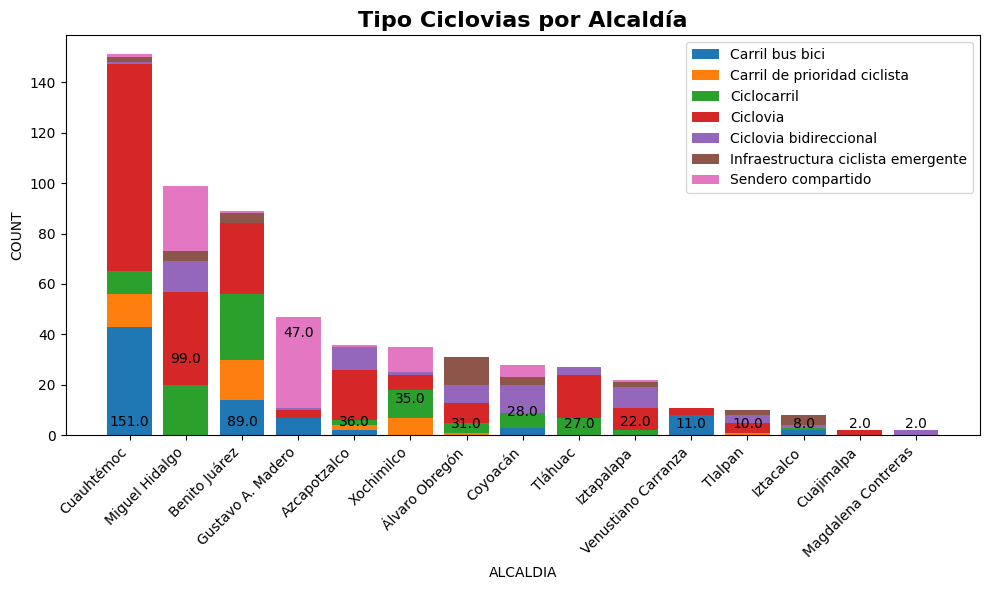

In [ ]:
stacked_barplot(df=type_ci_count,
                col1='TIPO_IC',
                col2='ALCALDIA',
                count='COUNT',
                title='Tipo Ciclovias por Alcaldía')

In [ ]:
long_dist_df = infraestructura_df[['ID_TRAMO','LONG_KM']]
long_dist_df

,ID_TRAMO,LONG_KM
0,1,2.04
1,2,0.24
2,3,0.48
3,4,0.25
4,5,0.29
...,...,...
593,597,1.20
594,598,1.16
595,107,0.16
596,514,0.18


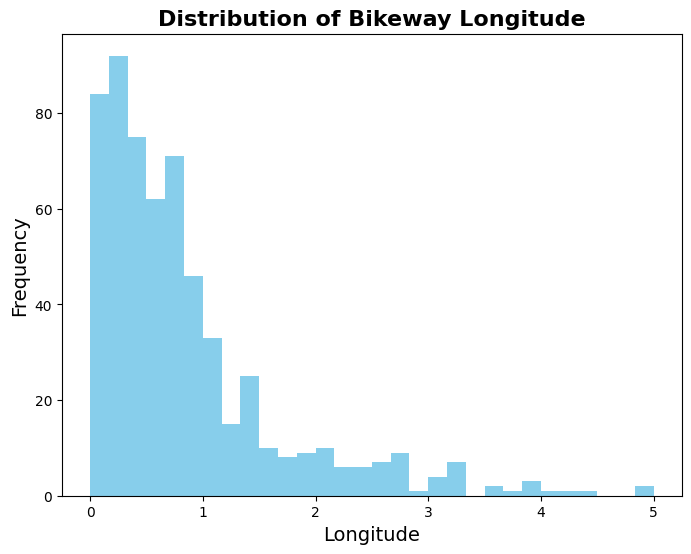

In [ ]:
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(long_dist_df['LONG_KM'], bins=30, range=(0, 5), color='skyblue')

# Add labels and title
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Bikeway Longitude', fontsize=16, fontweight='bold')

# Display the plot
plt.show()

In [ ]:
import geopandas as gpd

df_cdmx=gpd.read_file("alcaldias.geojson")
df_cdmx=df_cdmx[['nomgeo','geometry']]
df_cdmx.head()

,nomgeo,geometry
0,Milpa Alta,"POLYGON ((-98.99723 19.22731, -98.99745 19.227..."
1,Benito Juárez,"POLYGON ((-99.13679 19.40156, -99.13682 19.401..."
2,Gustavo A. Madero,"POLYGON ((-99.11860 19.58446, -99.11691 19.581..."
3,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
4,Iztacalco,"POLYGON ((-99.05584 19.42196, -99.05589 19.421..."


In [ ]:
alcaldias_df = infraestructura_df['ALCALDIA'].value_counts().reset_index()
alcaldias_df.head()

,ALCALDIA,count
0,Cuauhtémoc,151
1,Miguel Hidalgo,99
2,Benito Juárez,89
3,Gustavo A. Madero,47
4,Azcapotzalco,36


In [ ]:
# JOIN alcaldias_df con df_cdmx

import pandas as pd
from unidecode import unidecode  # Asegúrate de tener instalada esta librería

# Combinar dataframes usando la columna normalizada
df_merged = df_cdmx.set_index("nomgeo").join(alcaldias_df.set_index("ALCALDIA"))

# Eliminar columnas redundantes
#df_merged = df_merged.drop(['alcaldia_norm'], axis=1)

# Resultado
df_merged.head()

,geometry,count
nomgeo,,
Milpa Alta,"POLYGON ((-98.99723 19.22731, -98.99745 19.227...",NaN
Benito Juárez,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",89.0
Gustavo A. Madero,"POLYGON ((-99.11860 19.58446, -99.11691 19.581...",47.0
Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",36.0
Iztacalco,"POLYGON ((-99.05584 19.42196, -99.05589 19.421...",8.0


In [ ]:
df_merged['count'] = df_merged['count'].fillna(0)
df_merged = df_merged.reset_index()
df_merged.index += 1
df_merged.head()

,nomgeo,geometry,count
1,Milpa Alta,"POLYGON ((-98.99723 19.22731, -98.99745 19.227...",0.0
2,Benito Juárez,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",89.0
3,Gustavo A. Madero,"POLYGON ((-99.11860 19.58446, -99.11691 19.581...",47.0
4,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",36.0
5,Iztacalco,"POLYGON ((-99.05584 19.42196, -99.05589 19.421...",8.0


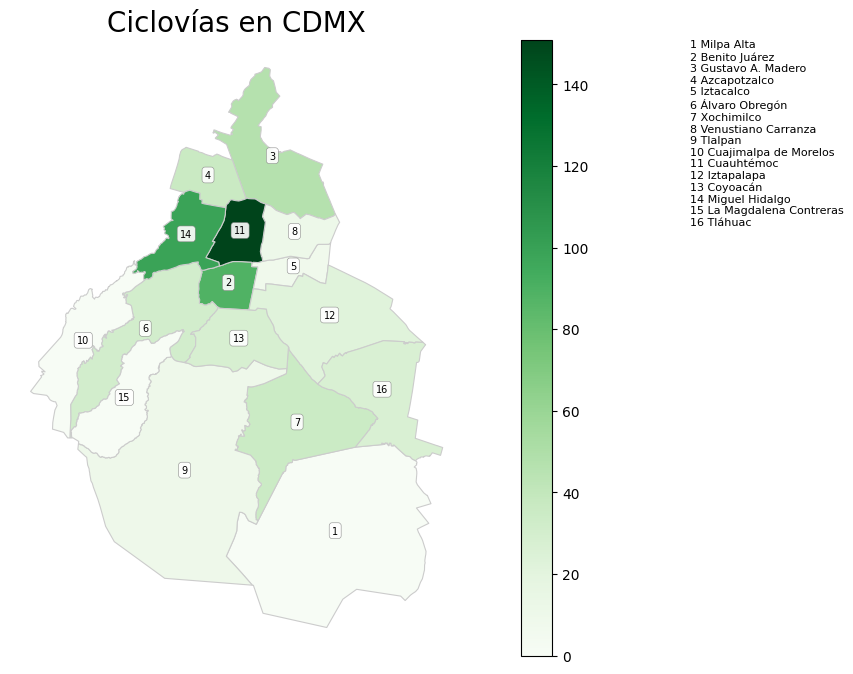

In [ ]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(15, 8))
df_merged.plot(column="count", cmap="Greens", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.axis("off")

titulo = str("Ciclovías en CDMX")
ax.set_title(titulo, fontdict={"fontsize": "20", "fontweight": "3"})

legend = ''

# Add annotation for every waterschap with a deelstroomgebied
bbox_props = dict(boxstyle="round", fc="w", ec="gray", alpha=0.9,lw=0.4)
for idx, row in df_merged.iterrows():    
    string = str(idx)
    x, y = row.geometry.centroid.coords[0]
    ax.annotate(string, xy=(x, y), color='black',
                    horizontalalignment='center', bbox=bbox_props, fontsize=7)
    legend = legend + f"{idx} {row['nomgeo']}\n"

ax.text(1.5, 1, legend,
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax.transAxes,
    fontsize=8)

fig.savefig(titulo + ".png", dpi=300)

plt.show()

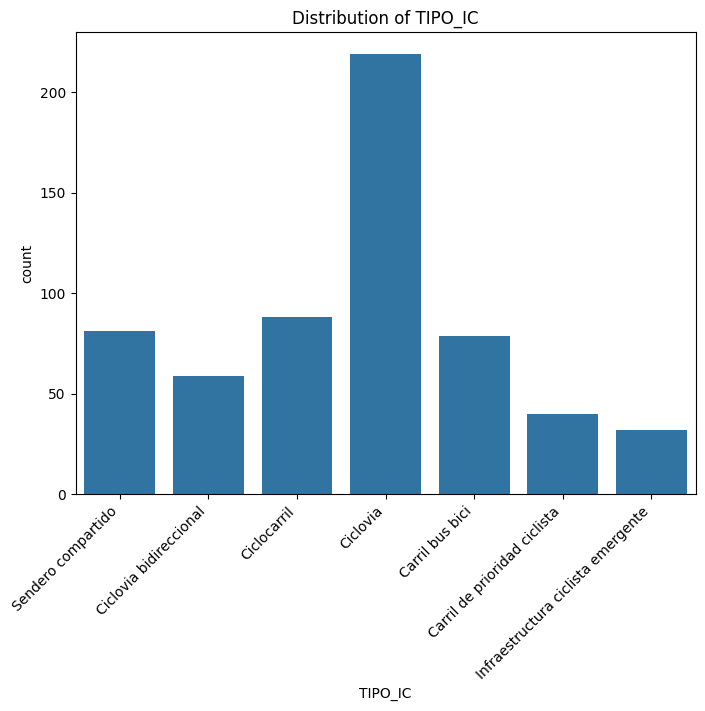

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=infraestructura_df, x='TIPO_IC')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.title('Distribution of TIPO_IC')
plt.show()

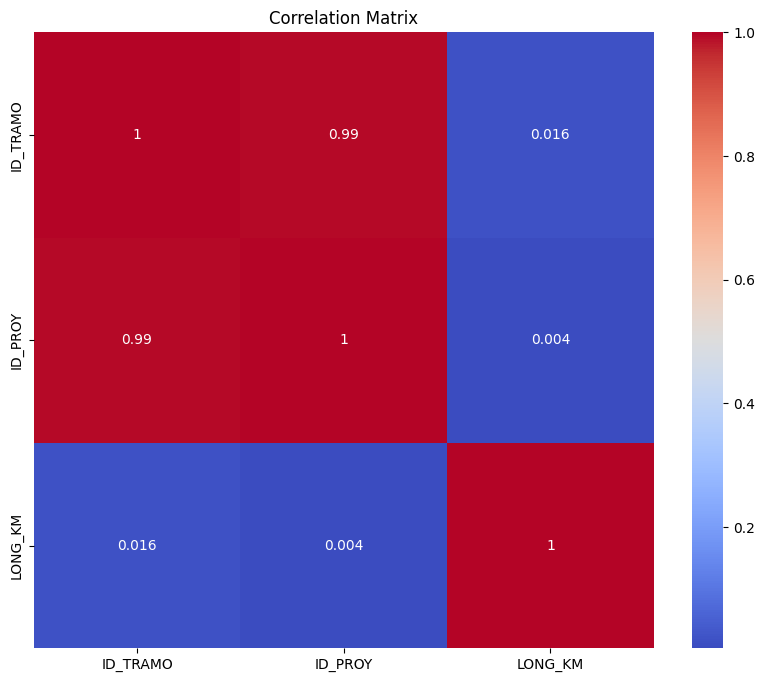

In [ ]:
ciclovias_numeric = infraestructura_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = ciclovias_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

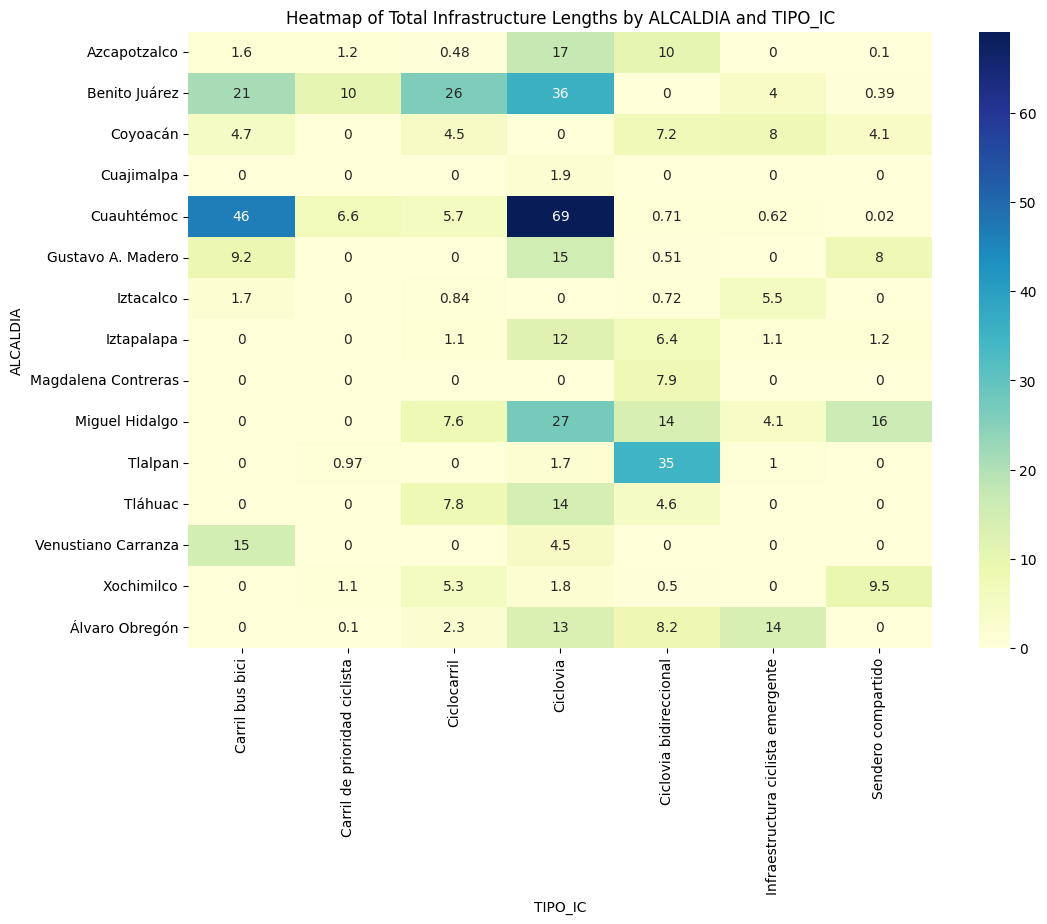

In [ ]:
alcaldia_tipo_ic = infraestructura_df.groupby(['ALCALDIA', 'TIPO_IC'])['LONG_KM'].sum().unstack('TIPO_IC').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(alcaldia_tipo_ic, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Total Infrastructure Lengths by ALCALDIA and TIPO_IC')
plt.show()

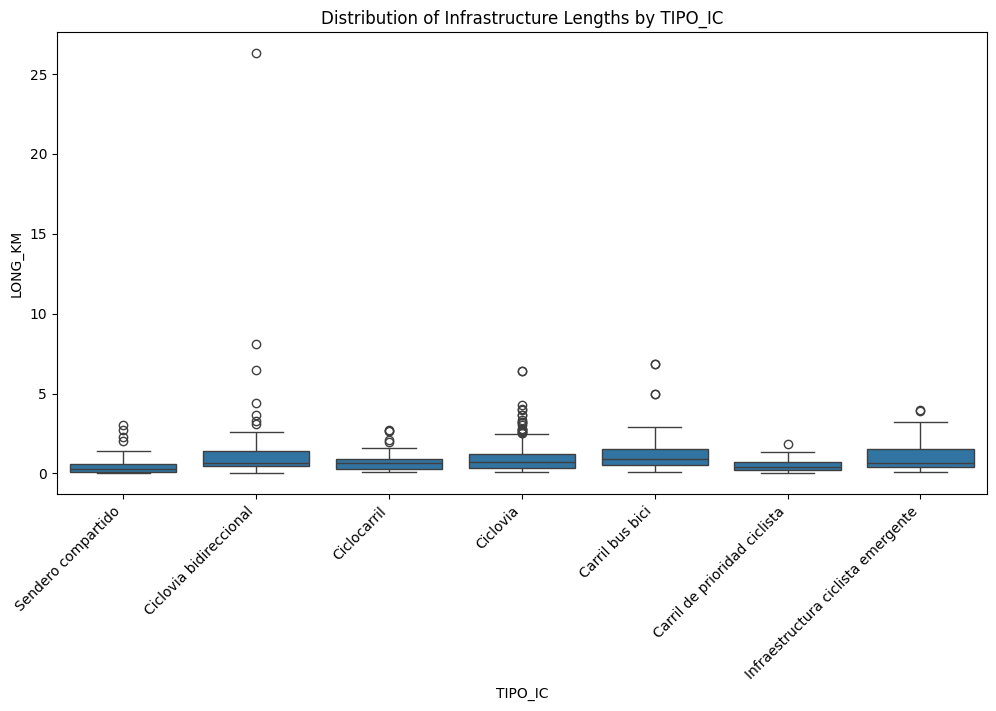

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='TIPO_IC', y='LONG_KM', data=infraestructura_df)

plt.xticks(rotation=45, ha='right')

plt.title('Distribution of Infrastructure Lengths by TIPO_IC')
plt.show()

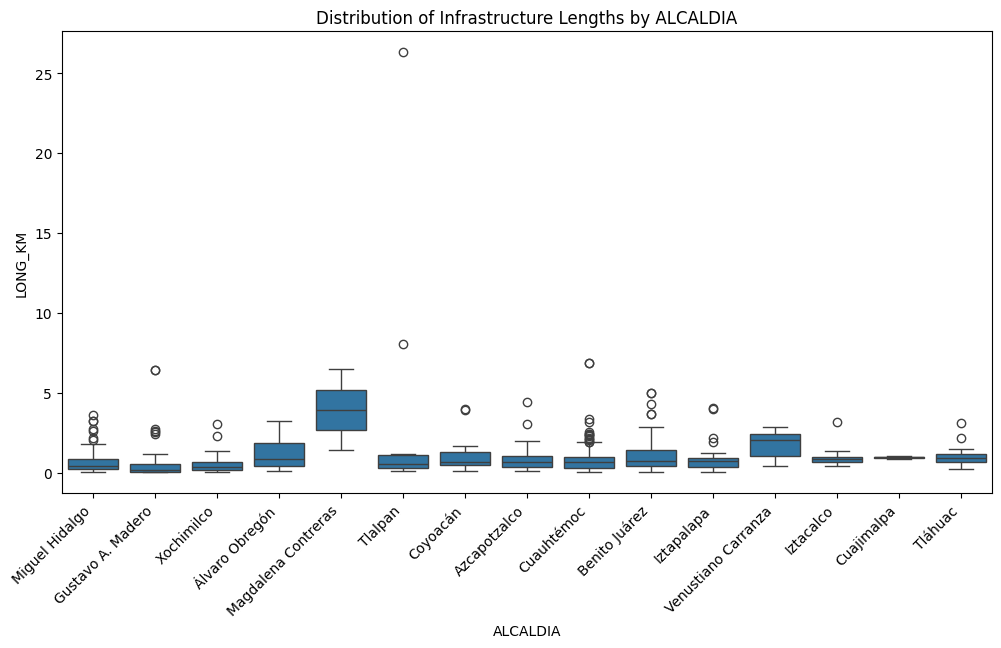

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ALCALDIA', y='LONG_KM', data=infraestructura_df)

plt.xticks(rotation=45, ha='right')

plt.title('Distribution of Infrastructure Lengths by ALCALDIA')
plt.show()

In [ ]:
import pandas as pd
from simpledbf import Dbf5

cobertura_dbf = Dbf5(COV_DBF_DIR)
cobertura_df = cobertura_dbf.to_dataframe()
cobertura_df.head()

,estado,nombre,vialidad,tipo_ic,tipo_via,instancia,ano,longitud,sentido,BUFF_DIST,ID
0,Activa,Ciudad de Mexico,Ciclovia de la Ciudad de Mexico,Ciclovia recreativa,Secundaria,SEDEMA,2004,0.564,Bidireccional,500.0,1.0
1,Activa,Ciudad de Mexico,Ciclovia de la Ciudad de Mexico,Ciclovia recreativa,Secundaria,SEDEMA,2004,1.864,Bidireccional,500.0,2.0
2,Activa,Ciudad de Mexico,Ciclovia de la Ciudad de Mexico,Ciclocarril,Arteria principal,SEDEMA,2004,0.476,Unidireccional,500.0,3.0
3,Activa,Ciudad de Mexico,Ciclovia de la Ciudad de Mexico,Ciclovia recreativa,Arteria principal,SEDEMA,2004,0.471,Bidireccional,500.0,4.0
4,Activa,Ciudad Universitaria,Ciclovia Campus Central,Ciclovia,Secundaria,UNAM,2004,0.159,Bidireccional,500.0,5.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25df4652-e935-424f-95eb-02091fa21a09' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>